In [2]:
import json

positive_phantom_files = json.load(open("data/positive_phantom_files.json"))
negative_phantom_files = json.load(open("data/negative_phantom_files.json"))
print(len(positive_phantom_files), len(negative_phantom_files))

14376 4933


In [3]:
import os

positive_phantom_file_cnt = {}
for name, values in positive_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        positive_phantom_file_cnt[f] = positive_phantom_file_cnt.get(f, set())
        positive_phantom_file_cnt[f].add(name)

positive_phantom_file_cnt = {k: len(v) for k, v in positive_phantom_file_cnt.items()}
positive_phantom_file_cnt = sorted(
    positive_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

negative_phantom_file_cnt = {}
for name, values in negative_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        negative_phantom_file_cnt[f] = negative_phantom_file_cnt.get(f, set())
        negative_phantom_file_cnt[f].add(name)
negative_phantom_file_cnt = {k: len(v) for k, v in negative_phantom_file_cnt.items()}
negative_phantom_file_cnt = sorted(
    negative_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

print(len(positive_phantom_file_cnt), len(negative_phantom_file_cnt))

121771 44515


In [4]:
import pandas as pd

tmp1 = []
for k, v in positive_phantom_file_cnt[:10]:
    tmp1.append([k, v, f"{v/len(positive_phantom_files):.1%}"])
tmp1 = pd.DataFrame(tmp1, columns=["filename_p", "release_p", "percent_p"])

tmp2 = []
for k, v in negative_phantom_file_cnt[:10]:
    tmp2.append([k, v, f"{v/len(negative_phantom_files):.1%}"])
tmp2 = pd.DataFrame(tmp2, columns=["filename_n", "release_n", "percent_n"])

pd.concat([tmp1, tmp2], axis=1)

,filename_p,release_p,percent_p,filename_n,release_n,percent_n
0,setup.cfg,12373,86.1%,setup.cfg,4565,92.5%
1,setup.py,2261,15.7%,setup.py,3768,76.4%
2,__init__.py,915,6.4%,README.md,3008,61.0%
3,README.md,660,4.6%,__init__.py,2157,43.7%
4,MANIFEST.in,477,3.3%,pyproject.toml,1612,32.7%
5,_version.py,413,2.9%,LICENSE,1376,27.9%
6,LICENSE,355,2.5%,MANIFEST.in,384,7.8%
7,pyproject.toml,320,2.2%,README.rst,373,7.6%
8,README.rst,320,2.2%,LICENSE.txt,291,5.9%
9,version.py,312,2.2%,utils.py,285,5.8%


In [5]:
positive_phantom_pyfile_cnt = [
    [k, _] for k, _ in positive_phantom_file_cnt if k.endswith(".py")
]
negative_phantom_pyfile_cnt = [
    [k, _] for k, _ in negative_phantom_file_cnt if k.endswith(".py")
]
print(len(positive_phantom_pyfile_cnt), len(negative_phantom_pyfile_cnt))

tmp1 = []
for k, v in positive_phantom_pyfile_cnt[:10]:
    tmp1.append([k, v, f"{v/len(positive_phantom_files):.1%}"])
tmp1 = pd.DataFrame(tmp1, columns=["filename_p", "release_p", "percent_p"])

tmp2 = []
for k, v in negative_phantom_pyfile_cnt[:10]:
    tmp2.append([k, v, f"{v/len(negative_phantom_files):.1%}"])
tmp2 = pd.DataFrame(tmp2, columns=["filename_n", "release_n", "percent_n"])

pd.concat([tmp1, tmp2], axis=1)

38523 23878


,filename_p,release_p,percent_p,filename_n,release_n,percent_n
0,setup.py,2261,15.7%,setup.py,3768,76.4%
1,__init__.py,915,6.4%,__init__.py,2157,43.7%
2,_version.py,413,2.9%,utils.py,285,5.8%
3,version.py,312,2.2%,main.py,214,4.3%
4,utils.py,171,1.2%,conf.py,189,3.8%
5,__main__.py,161,1.1%,example.py,187,3.8%
6,config.py,92,0.6%,__main__.py,172,3.5%
7,exceptions.py,91,0.6%,conftest.py,155,3.1%
8,conf.py,81,0.6%,base.py,148,3.0%
9,base.py,79,0.5%,config.py,139,2.8%


In [6]:
data = []
for name, values in positive_phantom_files.items():
    py_cnt = 0
    proj_sepc_change = 0
    for fn, fs in values["phantom_file"]:
        if fn.endswith(".py"):
            py_cnt += 1
        if os.path.basename(fn) in ["setup.py", "pyproject.toml"]:
            proj_sepc_change = 1
    data.append([name, len(values["phantom_file"]), py_cnt, proj_sepc_change, 0])

for name, values in negative_phantom_files.items():
    py_cnt = 0
    proj_sepc_change = 0
    for fn, fs in values["phantom_file"]:
        if fn.endswith(".py"):
            py_cnt += 1
        if os.path.basename(fn) in ["setup.py", "pyproject.toml"]:
            proj_sepc_change = 1
    data.append([name, len(values["phantom_file"]), py_cnt, proj_sepc_change, 1])

data = pd.DataFrame(
    data,
    columns=[
        "name",
        "num_phantom_files",
        "num_phantom_python_files",
        "proj_sepc_change",
        "label",
    ],
)
print(len(data))
data.head()

19309


,name,num_phantom_files,num_phantom_python_files,proj_sepc_change,label
0,pytest-testmon,1,0,0,0
1,paddlenlp,1,0,0,0
2,django-formset,31,0,0,0
3,feapder,5,1,0,0
4,xtestrunner,6,0,0,0


[1. 5. 0. 2.]


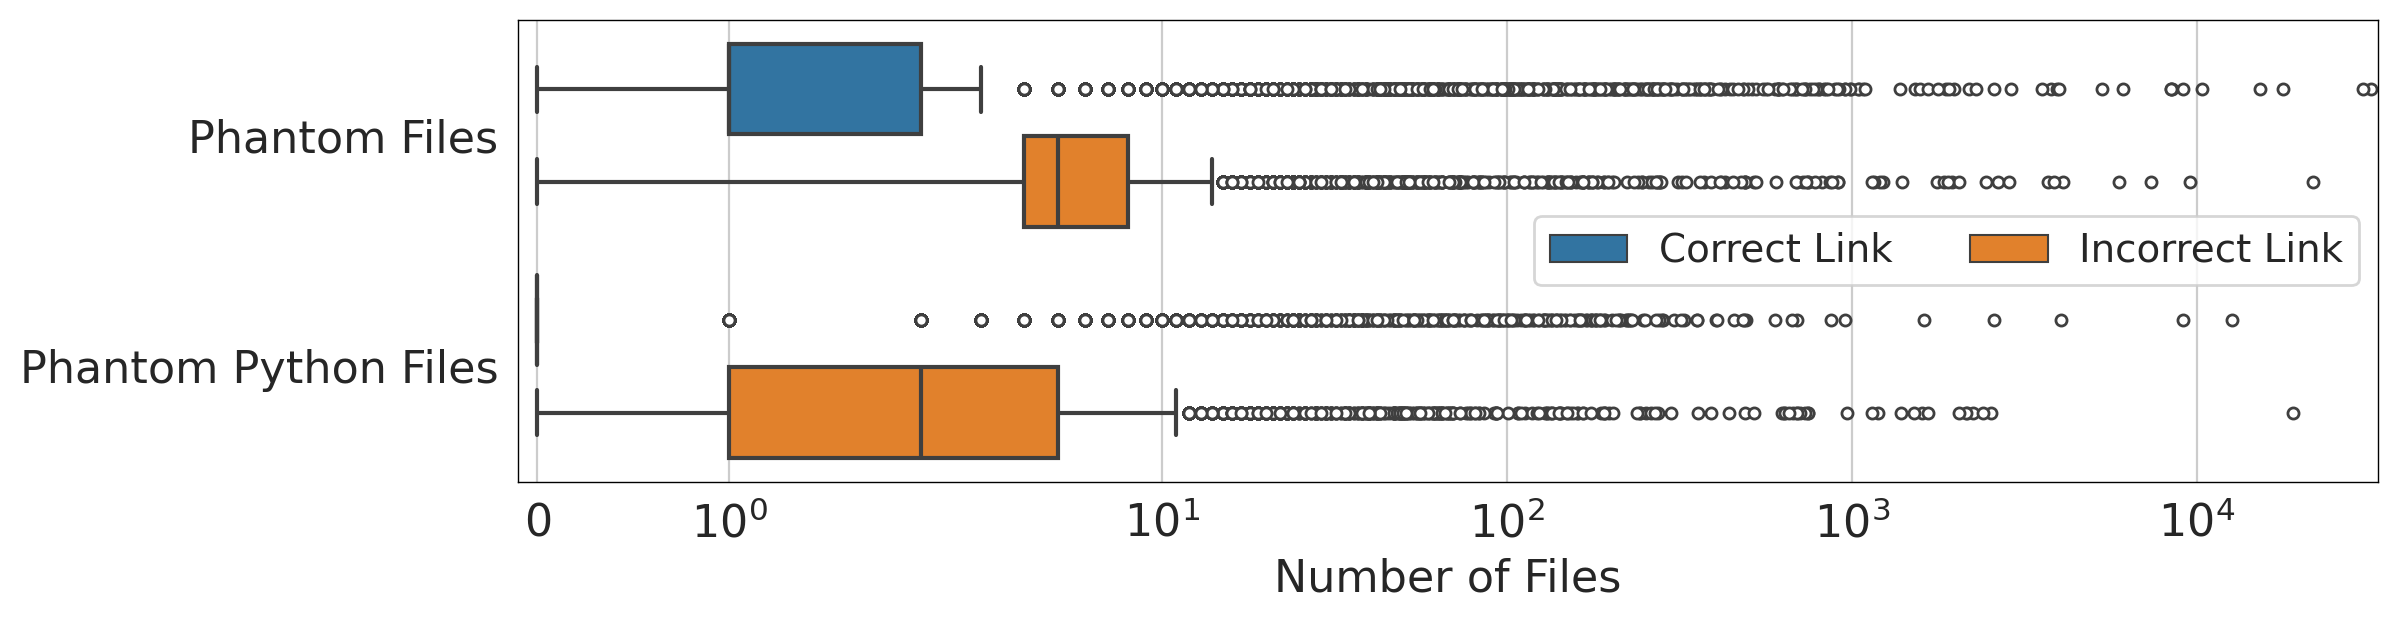

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format="retina"


def plot_phantom_files_dist(data):
    tmp1 = data[["num_phantom_files", "label"]].rename(
        columns={"num_phantom_files": "num_files"}
    )
    tmp1["type"] = "Phantom Files"
    tmp2 = data[["num_phantom_python_files", "label"]].rename(
        columns={"num_phantom_python_files": "num_files"}
    )
    tmp2["type"] = "Phantom Python Files"
    data = pd.concat([tmp1, tmp2], ignore_index=True)
    data["label"] = data["label"].map({0: "Correct Link", 1: "Incorrect Link"})
    print(data.groupby(["type", "label"]).median().values.reshape(4))
    with sns.axes_style("whitegrid"):
        # sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(12, 3))
        bp = sns.boxplot(
            data,
            x="num_files",
            y="type",
            hue="label",
            orient="h",
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 4},
            ax=ax,
        )
        ax.set_xscale("symlog", base=10)
        ax.set_xlim(-0.1)
        ax.set_ylabel(None)
        ax.set_xlabel("Number of Files", fontsize=16)
        ax.tick_params(labelsize=16)
        ax.legend(ncol=2, fontsize=14)
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linewidth(0.5)
        fig.savefig(f"figures/phantom_file_dist.pdf", bbox_inches="tight")


plot_phantom_files_dist(data)

In [8]:
from scipy.stats import mannwhitneyu

print(
    mannwhitneyu(
        data[data["label"] == 0]["num_phantom_files"],
        data[data["label"] == 1]["num_phantom_files"],
    )
)
print(
    mannwhitneyu(
        data[data["label"] == 0]["num_phantom_python_files"],
        data[data["label"] == 1]["num_phantom_python_files"],
    )
)

MannwhitneyuResult(statistic=8300404.5, pvalue=0.0)
MannwhitneyuResult(statistic=9019421.0, pvalue=0.0)


In [9]:
print(
    f'{len(data[(data["num_phantom_python_files"] == 0) & (data["label"] == 0)]) / len(data[data["label"] == 0]):.1%}'
)
print(
    f'{len(data[(data["num_phantom_python_files"] > 0) & (data["label"] == 1)]) / len(data[data["label"] == 1]):.1%}'
)
print(
    f'{len(data[(data["num_phantom_files"] < 4) & (data["label"] == 0)]) / len(data[data["label"] == 0]):.1%}'
)
print(
    f'{len(data[(data["num_phantom_files"] >= 4) & (data["label"] == 1)]) / len(data[data["label"] == 1]):.1%}'
)

75.3%
92.6%
86.6%
77.0%


In [10]:
data.groupby(["label", "proj_sepc_change"])[
    "name"
].count().to_frame().reset_index().pivot(
    index="label", columns="proj_sepc_change", values="name"
)

proj_sepc_change,0,1
label,,
0,12005,2371
1,93,4840


In [11]:
cnt = 0
for name, values in positive_phantom_files.items():
    for fn, fs in values["phantom_file"]:
        if os.path.basename(fn) == "setup.cfg":
            if cnt == 10:
                break
            print(name, values["version"], values["url"])
            cnt += 1

pytest-testmon 1.4.5 https://github.com/tarpas/pytest-testmon
paddlenlp 2.5.2 https://github.com/paddlepaddle/paddlenlp
django-formset 0.13.3 https://github.com/jrief/django-formset
feapder 1.8.6b2 https://github.com/boris-code/feapder
flytekit 1.4.0 https://github.com/flyteorg/flytekit
constructs 3.4.265 https://github.com/aws/constructs
tencentcloud-sdk-python 3.0.844 https://github.com/tencentcloud/tencentcloud-sdk-python
eomaps 6.1.3 https://github.com/raphaelquast/eomaps
chromadb 0.3.11 https://github.com/chroma-core/chroma
hiphp 0.3.1 https://github.com/yasserbdj96/hiphp


In [1]:
from joblib import load
import pandas as pd
from sklearn.metrics import roc_auc_score

df = pd.read_csv("data/validator_dataset.csv")
tmp = df[
    ((df["label"] == 1) & (df["setup_change"] == 0))
    | ((df["label"] == 0) & (df["setup_change"] == 1))
]
print(len(tmp[tmp["label"] == 1]), len(tmp[tmp["label"] == 0]))

for model_name in ["lr", "dt", "rf", "ada", "gb", "xgb"]:
    model = load(f"models/best_{model_name}.joblib")
    pred = pd.read_csv(f"data/{model_name}_prediction.csv")
    print(
        roc_auc_score(
            tmp["label"],
            model.predict_proba(
                tmp[
                    [
                        "num_phantom_pyfiles",
                        "setup_change",
                        "name_similarity",
                        "tag_match",
                        "num_maintainers",
                        "num_maintainer_pkgs",
                        # "maintainer_max_downloads",
                    ]
                ]
            )[:, 1],
        ),
        roc_auc_score(pred["true"], pred["score"]),
    )

106 1982
0.8904146754755058 0.9653631477604012
0.8837485482550502 0.9940128650460411
0.919344858442968 0.9968546948700794
0.8794956495249701 0.9937526587491079
0.9206442891685547 0.9975516100499052
0.9176789216152924 0.9973306751200646


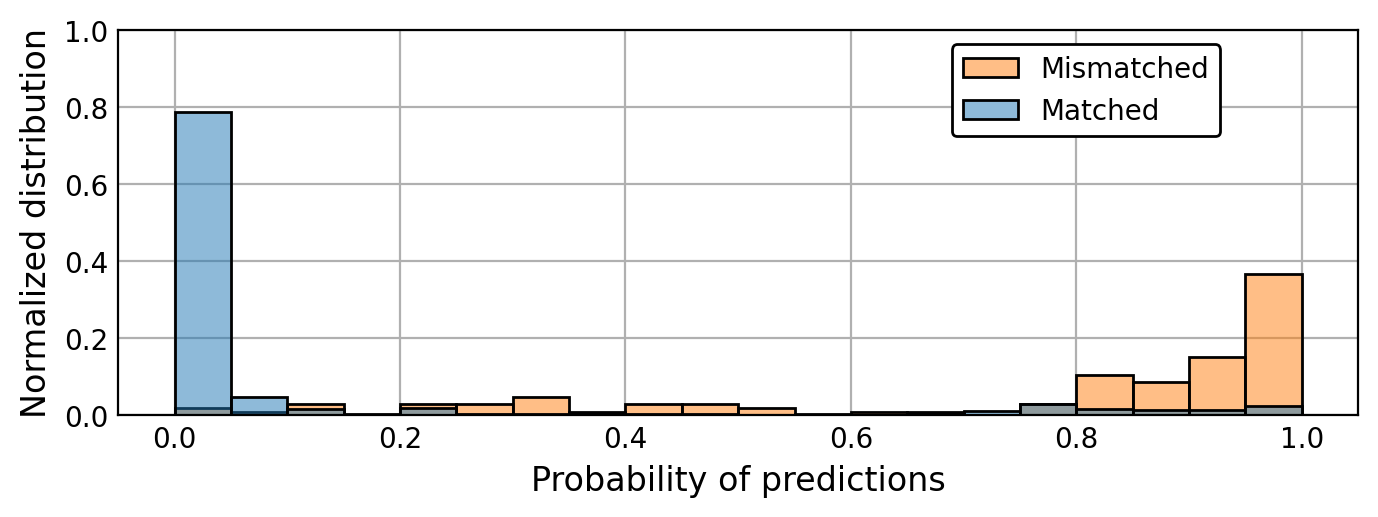

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def plot_prediction(model_name: str, filter=False):
    data = pd.read_csv(f"data/{model_name}_prediction.csv")
    if filter:
        df = pd.read_csv("data/validator_dataset.csv")
        data = data[
            ((df["label"] == 1) & (df["setup_change"] == 0))
            | ((df["label"] == 0) & (df["setup_change"] == 1))
        ]

    with sns.axes_style():
        fig, ax = plt.subplots(figsize=(8, 2.5))
        sns.histplot(
            data,
            x="score",
            hue="true",
            bins=20,
            binrange=[0, 1],
            stat="probability",
            common_norm=False,
            ax=ax,
        )
        # change legend location
        ax.legend(
            labels=["Mismatched", "Matched"],
            loc="upper right",
            bbox_to_anchor=(0.9, 1.0),
            facecolor="white",
            framealpha=1,
            edgecolor="black",
        )
        ax.grid(True)
        ax.set_axisbelow(True)
        ax.set_ylim(0, 1.0)
        ax.tick_params(length=0)
        ax.set_xlabel("Probability of predictions", fontsize=12)
        ax.set_ylabel("Normalized distribution", fontsize=12)


plot_prediction("rf", filter=True)